# <center><font size=10, color="#7B24FF"><u>Gradient Boosting Machine: GBM</u> </font>

# Introduction to GBM

- Another very popular boosting algorithm is **Gradient Boosting**. Just like AdaBoost, Gradient Boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor. 


- Instead of tweaking the instance weights at every iteration like AdaBoost does,  the weights of the training instances are not tweaked. Instead, each predictor is trained using the $\textbf{residual errors}$ of its predecessor as labels.  



- The bellow diagram shows the technique known as gradient boosted trees where the base learner is a CART.

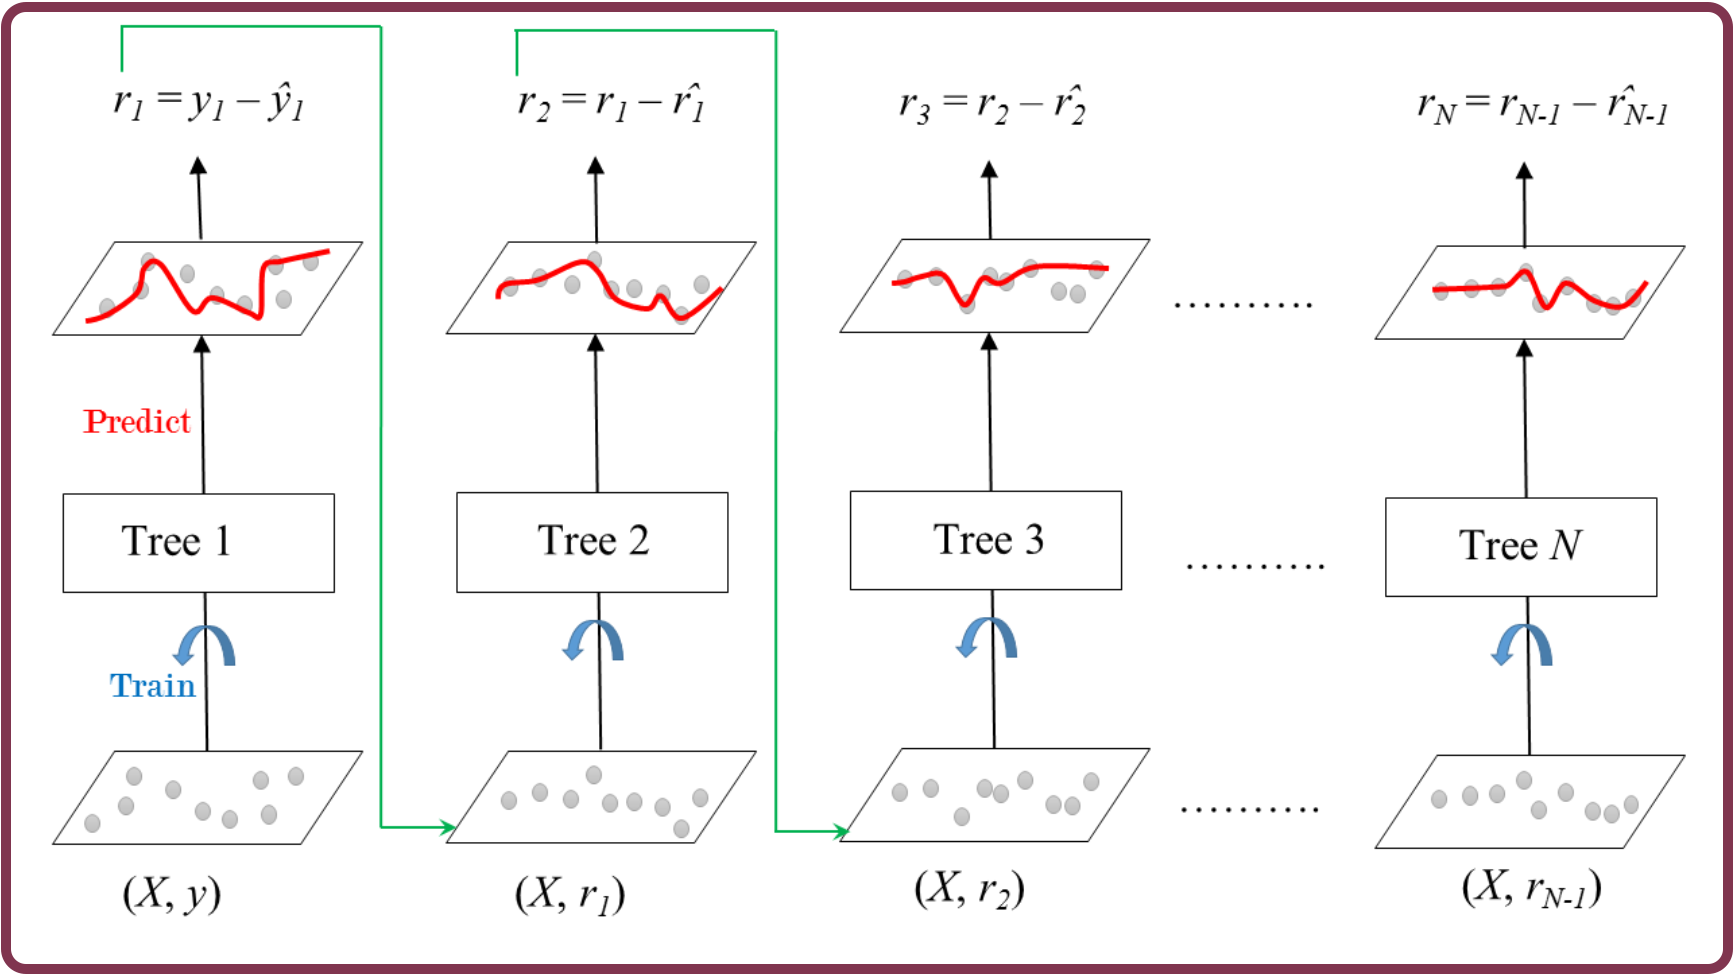


## Gradient Boosted Trees Workflow for Regression: Training

  - The ensemble consists of N predictors (trees for example as shown in the diagram above).
  
  
  - Predictor 1 is trained using the features matrix X and the dataset labels y.
  
  
  - The predictions labeled $\hat y_1$ are used to determine the training set residual errors $r_1$.
  
  
  - Tree2 is then trained using the features matrix X and the residual errors $r_1$ of Tree1 as labels. 
  
  
  - The predicted residuals $\hat r_1$ are then used to determine the residuals of residuals which are labeled $r_2$.
  
  
  - This process is repeated until all of the N trees forming the ensemble are trained.

## Shrinkage

- An important parameter used in training gradient boosted trees is $\textbf{shrinkage}$.

- In this context, shrinkage refers to the fact that the prediction of each tree in the ensemble is shrinked after it is multiplied by a $\textbf{learning rate}\ \ \eta$ (eta) which is a number between 0 and 1. 

- Similarly to AdaBoost, there's a trade-off between eta and the number of estimators. Decreasing the learning rate needs to be compensated by increasing the number of estimators in order for the ensemble to reach a certain performance.

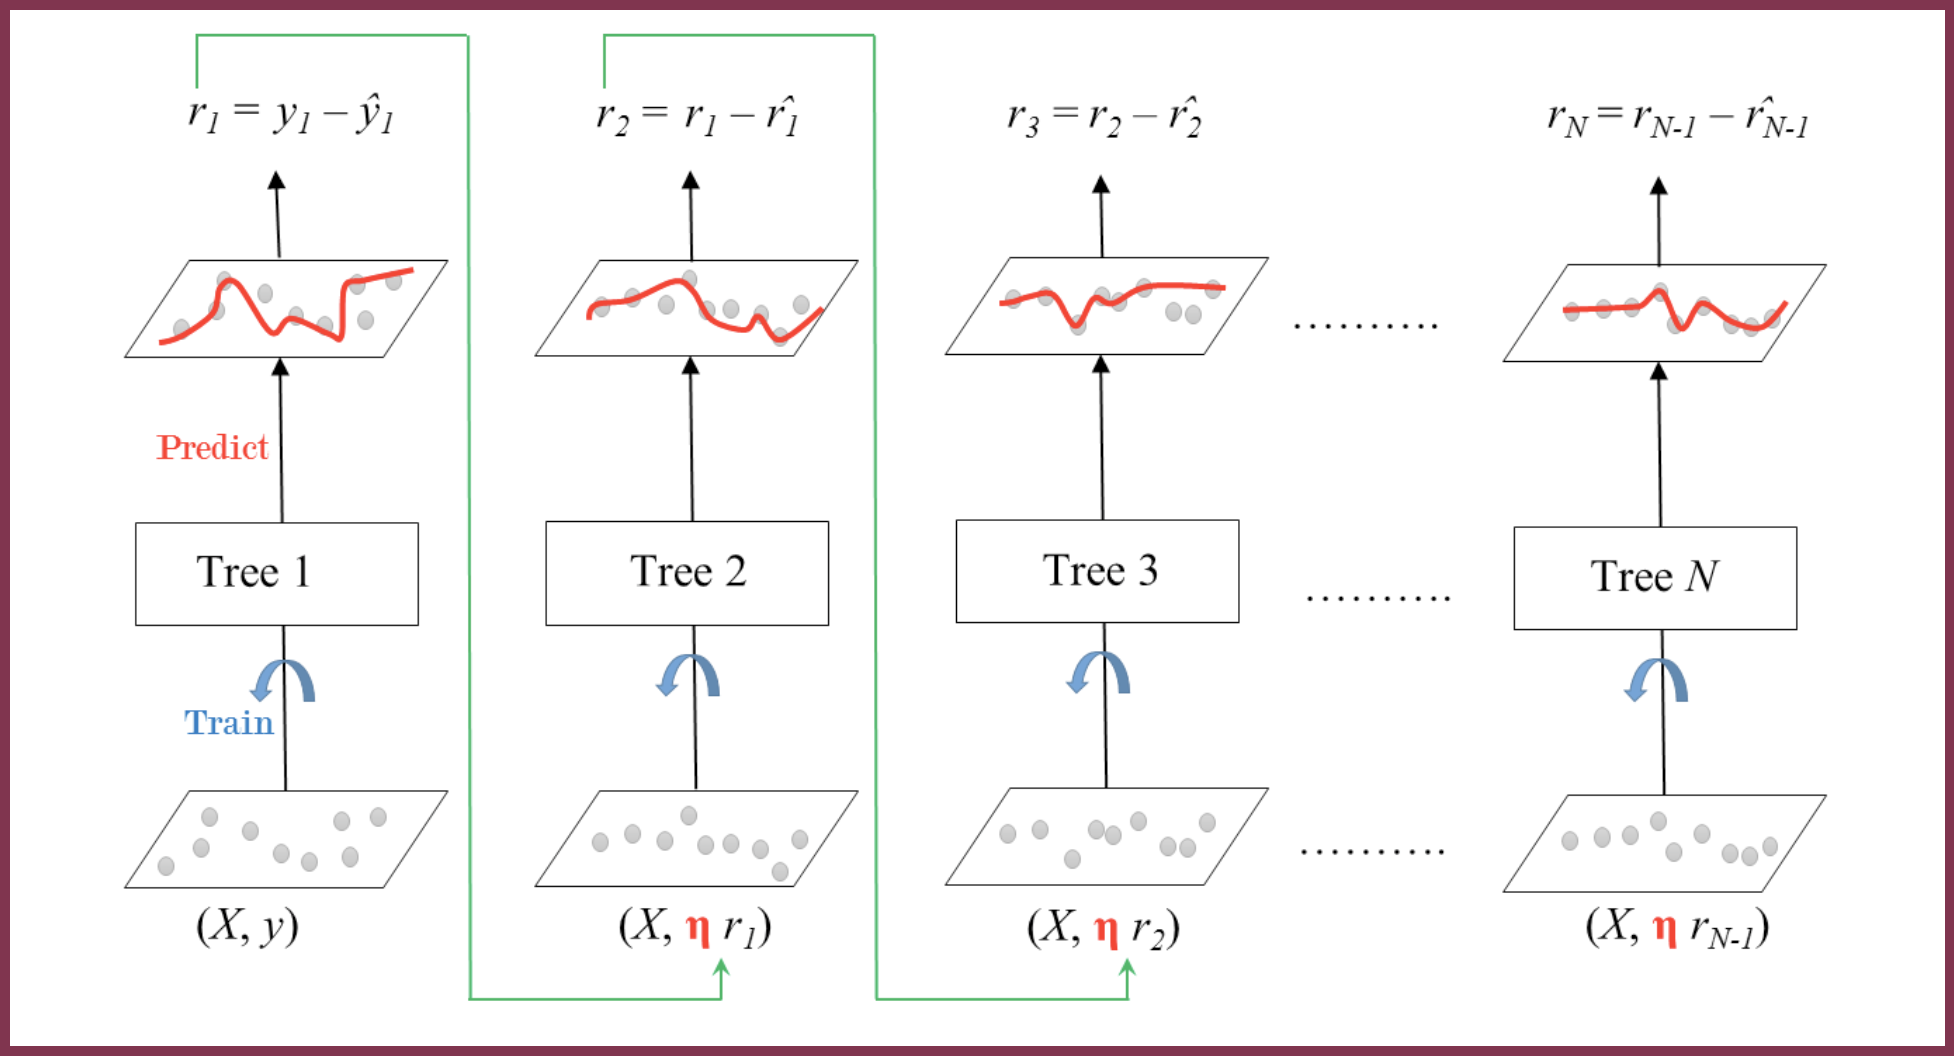

### Gradient Boosted Trees: Prediction

- Once all trees in the ensemble are trained, prediction can be made. When a new instance is available, each tree predicts a label and the final ensemble prediction is given by the formula shown here:

**Regression**, 

### $$y_{pred} = y_1 + \eta r_1 + \ldots + \eta r_N$$


For classificatin, chech sklearn documentation for more information [here](https://scikit-learn.org/stable/modules/ensemble.html#id17)

### Note

- There is one important drawback to this sequential learning technique: it cannot be parallelized (or only partially), since each predictor can only be trained after the previous predictor has been trained and evaluated. As a result, it does not scale as well as bagging or pasting.

# <center><font size=6, color="#7B249F"><u>Gradient Boosting Implementation in SkLearn</u> </font>

- In scikit-learn, the class for a gradient boostings are:

    - For regression prblems: `GradientBoostingRegressor`. 
    - For classification: `GradientBoostingClassifier`
    

**The options (parameters) of Gradient Boosting predictor**: there are several parameters that can be passed to the estimators mentioned above, we will mention the mose common ones:

   - `learning_rate` : Learning rate shrinks the contribution of each tree in the model. (there is always a trade-off between `learning_rate` and `n_estimators`)
   
   -  `n_estimators`: this represents the number of trees in the model. Usually, the higher it is, the better the model learns the data.
   
      
   - `max_depth`: This signifies how deep our tree is. It is used to control overfitting.
   
   
**Check hyperparameter tuning section for more information about parameters and hyperparameters** [here](#List-of:--hyperparameters) or check the sklearn documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)


### Training a Gradient Boosting Regressor:

Here we mention the steps of training an Adaboost Classifier:
  - **Step 01**: Import the regressor `GradientBoostingRegressor` or `GradientBoostingClassifier` from `sklearn.ensemble` 
  
  - **Step 02**: Import the splitting function `train_test_split` from `sklearn.model_selection`, also import the evaluation metrics such as `roc_auc_score` or `mean_squared_error` from `sklearn.metrics`.
  
  - **Step 03**: Split the data into train and test sets
  - **Step 04**: Instantiate the classifier (regressor), and set:
      - **n_estimators**: to a number estimators 
      - Other parameters based on your needs
  - **Step 05**: Fit the classifier (regressor) to the training set
  - **Step 06**: Generate probability predictions.
  - **Step 07**: Assess the model performance on test set



**Python syntax for training gradient boosting (classifier and regressor)**,

```python
 # Import models and utility functions
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
# Set seed for reproducibility
SEED = 1
# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=SEED)


 # Instantiate a GradientBoostingRegressor 'gbt'
gbt = GradientBoostingRegressor(n_estimators=300, 
                                max_depth=1, 
                                random_state= 1)
# Fit 'gbt' to the training set
gbt.fit(X_train, y_train)

# Predict the test set labels
y_pred = gbt.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print the test set RMSE
print('Test set RMSE: {:.2f}'.format(rmse_test))
```

___

# <center><font size=6, color="#7B249F"><u> Auto Dataset Project Using Gradient Boosting Regressor</u> </font>

In [1]:
## ======================================================================
#            Importing the necessary modules and tools
## ======================================================================

import pandas as pd; import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor


# Import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# from sklearn.metrics import necessary metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import roc_auc_score , accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# Preprocessing tools
from sklearn.preprocessing import MinMaxScaler


# Set notebook options
# --------------------
pd.options.display.float_format = '{:,.3f}'.format
%matplotlib inline

In [2]:
auto = pd.read_csv('auto_mpg.csv')
print("*" * 50)
auto.info()
print("*" * 50)
auto.head()

**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
**************************************************


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.000,8,307.000,130,3504,12.000,70,1,chevrolet chevelle malibu
1,15.000,8,350.000,165,3693,11.500,70,1,buick skylark 320
2,18.000,8,318.000,150,3436,11.000,70,1,plymouth satellite
3,16.000,8,304.000,150,3433,12.000,70,1,amc rebel sst
4,17.000,8,302.000,140,3449,10.500,70,1,ford torino


In [3]:
auto['horsepower'] = pd.to_numeric(auto.horsepower, errors = 'coerce')
auto.dropna(inplace=True)

# Mapping the origin variable to names
# ------------------------------------

auto['origin'] = auto['origin'].map({1: 'USA',
                                     2: 'Europe',
                                     3: 'Japan'})
# Encoding the origin variable
# ------------------------------
auto = pd.get_dummies(auto, columns = ['origin'], prefix = '', 
                      prefix_sep = '', drop_first=True)
X = auto.drop(['mpg', 'car name'], axis=1)
y = auto['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.20, 
                                                    random_state=3)

In [4]:
## ================================================================
#      Training Gradient Boosting Regressor
## ================================================================

# Instantiate gb
# --------------
gb = GradientBoostingRegressor(max_depth=1, 
                              n_estimators= 300,
                              random_state=1)

# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = mse_test**0.5

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 2.827


___

# <center><font size=6, color="#7B249F"><u> Breast Cancer Project Using Gradient Boosting Classifier</u> </font>

In [6]:
## ===================================================
#            Reading and exploring the data
## ===================================================
data_bc = pd.read_csv('breastcancer.csv')
print("*" * 50)
data_bc.info()
print("*" * 50)
data_bc.head()

**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   id                       569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,842302,17.990,10.380,122.800,"1,001.000",0.118,0.278,0.300,0.147,...,25.380,17.330,184.600,"2,019.000",0.162,0.666,0.712,0.265,0.460,0.119
1,M,842517,20.570,17.770,132.900,"1,326.000",0.085,0.079,0.087,0.070,...,24.990,23.410,158.800,"1,956.000",0.124,0.187,0.242,0.186,0.275,0.089
2,M,84300903,19.690,21.250,130.000,"1,203.000",0.110,0.160,0.197,0.128,...,23.570,25.530,152.500,"1,709.000",0.144,0.424,0.450,0.243,0.361,0.088
3,M,84348301,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,...,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173
4,M,84358402,20.290,14.340,135.100,"1,297.000",0.100,0.133,0.198,0.104,...,22.540,16.670,152.200,"1,575.000",0.137,0.205,0.400,0.163,0.236,0.077


In [7]:
## ===================================================
#.             Data Preprocessing
## ===================================================
from sklearn.preprocessing import LabelEncoder

# Instantiate label encoder
# ========================
lab_enc = LabelEncoder()

# Fit label encoder and return encoded labels
# -------------------------------------------
data_bc['diagnosis'] = lab_enc.fit_transform(data_bc['diagnosis'])

# Results in appending a new column to df
# ---------------------------------------
data_bc['diagnosis'].unique()

array([1, 0])

In [8]:
# checkking missing value
# ----------------------
data_bc.isnull().sum()

diagnosis                  0
id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
# create features and response variables
# --------------------------------

# Features
# --------
X = data_bc.iloc[:,2:31]  

# Target
# ------
y = data_bc.iloc[:,0] 

# Create train and test sets
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30,
                                                    random_state=1, 
                                                    stratify= y)

In [10]:
## ==================================================
#.      Fitting Adaboost Algorithm
## ==================================================

gbm_model = GradientBoostingClassifier() 
gbm_model.fit(X_train, y_train)


y_pred_gbm = gbm_model.predict(X_test)

print(classification_report(y_test, y_pred_gbm))


conf_matrix = confusion_matrix(y_test, y_pred_gbm)
#plot_confusion_matrix(conf_matrix, classes=[0,1])

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       107
           1       0.96      0.86      0.91        64

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.93       171



In [11]:
print("*"*40)
print("The GBM Accuracy score: {:0.4f}".format(accuracy_score(y_test, y_pred_gbm)))
print("The GBM Area Under ROC: {:0.4f}".format(roc_auc_score(y_test, y_pred_gbm)))
print("*"*40)

****************************************
The GBM Accuracy score: 0.9357
The GBM Area Under ROC: 0.9203
****************************************


In [12]:
## ==================================================
#.      Fitting Gradient Boosting Classifier with 
#.      preset parameters
## ==================================================

# Instantiate gb_clf
# ------------------

gb_clf = GradientBoostingClassifier(max_depth=3, 
                                   n_estimators= 300,
                                   random_state=1)

gb_clf.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
# ---------------------------------------------------------
y_pred_proba = gb_clf.predict_proba(X_test)[:, 1]

y_pred_gb_clf = gb_clf.predict(X_test)
# Evaluate test-set roc_auc_score
# --------------------------------
gb_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
#--------------------

print("*"*40)
print("The GBM Accuracy score: {:0.4f}".format(accuracy_score(y_test, y_pred_gb_clf)))
print("The GBM Area Under ROC: {:0.4f}".format(gb_roc_auc))
print("*"*40)

****************************************
The GBM Accuracy score: 0.9415
The GBM Area Under ROC: 0.9847
****************************************


___

# <center><font size=6, color="#7B249F"><u>Gradient Boosting Hyperparameter Tuning</u> </font>

## List of:  hyperparameters
**There are a handful of hyperparameters that may be tuned for this:**


   - `n_estimators`: this represents the number of trees in the model. Usually, the higher it is, the better the model learns the data.
   
   
   - `max_depth`: This signifies how deep our tree is. It is used to control overfitting.
   
   
   - `min_samples_split`: This is the minimum number of samples required to split an internal node. Values that are too high can prevent the model from learning relations.
   
   
  - `learning_rate`: This controls the magnitude of change in the estimates. Lower values with a higher number of trees are generally preferred.
  
  
  - `loss`: This refers to the loss function that is minimized in each split. deviance is used in the algorithm as the default parameter, while the other is exponential.
  
  
  - `max_features`: This represents the number of features we have to consider when looking for the best split.
  
  
 - `criterion`: This function measures the quality of the split and supports friedman_mse and mae to evaluate the performance of the model.
 
 
 - `subsample`: This represents the fraction of samples to be used for fitting the individual base learners. Choosing a subsample that is less than 1.0 leads to a reduction of variance and an increase in bias.


 - `min_impurity_split`: This is represented as a threshold to stop tree growth early.
 
**The list of parameters of gradient boosting predictor**, 
```python

gb=GradientBoostingClassifier()
print("="*40)
for key, value in gb.get_params().items():
    print("{:30}{}".format(key, value))
print("="*40)

========================================
ccp_alpha                     0.0
criterion                     friedman_mse
init                          None
learning_rate                 0.1
loss                          deviance
max_depth                     3
max_features                  None
max_leaf_nodes                None
min_impurity_decrease         0.0
min_samples_leaf              1
min_samples_split             2
min_weight_fraction_leaf      0.0
n_estimators                  100
n_iter_no_change              None
random_state                  None
subsample                     1.0
tol                           0.0001
validation_fraction           0.1
verbose                       0
warm_start                    False
========================================
```

In [13]:
## =========================================================
#.      Gradient Boosting Classifier Hyperparameter Tuning 
#.      using GridSearch CV
## =========================================================

# Import GridsearchCV
# -------------------
from sklearn.model_selection import GridSearchCV

# Create a dictionary of the grid
# -----------------------------
gbm_grid = {
    "n_estimators":[100,150,200],
    "learning_rate": [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
    "max_depth":[3, 5, 8],
    "max_features":["log2","sqrt"],
    }

# Instantiate the grid search CV
# ------------------------------
grid_gb = GridSearchCV(
            estimator=GradientBoostingClassifier(random_state=1),
            param_grid= gbm_grid,
            cv=5, 
            n_jobs=8,
            verbose = 1) 

In [14]:
# Fit the grid seach object to the training data
# ---------------------------------------------
grid_gb.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=8,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9,
                                           1],
                         'max_depth': [3, 5, 8],
                         'max_features': ['log2', 'sqrt'],
                         'n_estimators': [100, 150, 200]},
             verbose=1)

In [15]:
# Print the best parameters
# -------------------------
print("*"*40)
for hyper_name, val in grid_gb.best_params_.items():
    print("{0:18}: {1}".format(hyper_name, val))

# print the best score
# ---------------------
print("*"*40)
print('The best achieved score: {:.5f}'.format(grid_gb.best_score_))
print("*"*40)

****************************************
learning_rate     : 0.7
max_depth         : 3
max_features      : sqrt
n_estimators      : 100
****************************************
The best achieved score: 0.97984
****************************************


In [16]:
# Train the best classifier
# --------------------------
best_clf = GradientBoostingClassifier(
              random_state=1,
              learning_rate=0.7, 
              max_depth=3,
              max_features='sqrt', 
              n_estimators=100)
# Fit the best classifier
# ------------------------
best_clf.fit(X_train, y_train)

# Make predictions
# ----------------

best_preds = best_clf.predict(X_test)

print("The Gradient Boosting Classification report".center(60))
print("*"*60)
print(classification_report(y_test, best_preds))
print("*"*60)

        The Gradient Boosting Classification report         
************************************************************
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       107
           1       0.98      0.88      0.93        64

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171

************************************************************
